The following script consists of a Python version of Andrew Ng's Stanford Course 'Machine Learning' taught on the Coursera Platform.

**Note: All exercise data and structure are credited to Stanford University**

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them.

# Exercise 1 - Creating an Identity Matrix

In [23]:
# Import numpy libraries to deal with matrixes and vectors
import numpy as np
# Import pandas do read data files
import pandas as pd
# Import matplotlib to plot data
import matplotlib.pyplot as plt

# Import 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

# Matplotlib notebook property
%matplotlib inline

First exercise consists of creating a 5 by 5 identity matrix. The exercise is just used as an example to get acquainted with matrix notation. 
<br>
Identity matrixes are matrixes where the main diagonal elements are all equal to 1 and other elements are equal to 1:

<img src="assets/identity-matrix.png">

In [24]:
# Warm up exercise - Create a 5 by 5 identity matrix - Equivalent to Eye function in Octave

def warmUpExercise() -> np.array:
    A = np.identity(5)
    return A

In [25]:
#Calling the Identity Matrix
print('5x5 Identity Matrix: \n')
warmUpExercise()

5x5 Identity Matrix: 



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Exercise 2 - Plotting the Data

The exercise consists of plotting and visualizing data from a restaurant franchise. This is a good example of a simple dataset with two variables regarding a city where a fictional company has franchises. 
<br>
A common data science task consists of finding correlations between variables - and for this business, they want to see if there is some correlation between the profit that they make at each restaurant and the population of the city where the restaurant is based.
<br>
On X-axis we will have the population (in 0000) for each city and on Y-Axis we will have a look for profit in (0000 $) for each restaurant. Each city is mapped using a red cross on the plot.

In [29]:
# Read Text File and create X and y variables - 
# in terms of comparison with Octave to have array objects
ex1_file = pd.read_csv('ex1data1.txt', header=None) 
X = np.array(ex1_file.iloc[:,0])
y = np.array(ex1_file.iloc[:,1])

print('# of training examples: {}'.format(len(X)))
m = len(X)

# of training examples: 97


In [30]:
def plotData(
    X: np.array,
    y: np.array
) -> None:
    plt.scatter(X,y, marker='x', s=17, color='red')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    plt.show()

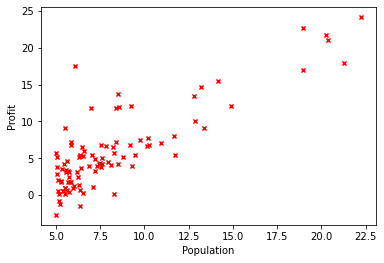

In [31]:
plotData(X,y)

We can see, visually, that there might be some correlation between population and profit for each restaurant. Why? Because, there might be a line that will be able to predict profit based on population - as you can see, on average, when the population increases, so does the profit.
<br>
<br>
If the restaurant CEO asked: **I wanna open a new restaurant and there are about 150 thousand people living there. How much profit should I expect?**
<br>
<br>
If you rely on the plot, you might say that, just by looking at the data, he should expect approximately 120 thousand dollars. 
<br>
But as a data scientist, you want to find a the optimal line that predicts the profit of this new restaurant? **And how can you find that optimal line?**
<br>
- By finding a line that minimizes the distance between each point and that line - in other words, the line with less error!

# Exercise 3 - Cost and Gradient Descent

This minimization can be achieved with a minimization of a cost function. And that function consists of the error that we want to minimize with respect to the intercept (what we call theta 0) and the slope (what we call theta 1). 
<br>
**Conclusion: We want to find the thetas that produce the minimum value of the error.**
<br>
<br>
Next we will calculate our cost function for the first arbitraty thetas (0's for each one). 
<br>
To update the value of the thetas, we will use gradient descent to take us to a value more closer to the minimum of the cost function / error.

**Remember (from Andrew's slides):**

<img src="assets/cost_gradient.JPG">

In [32]:
# Add column of ones to X vector and initializing Theta object
# Calling X_ext (extended) so that we do not modify original X object
X_ext = np.array([np.ones(len(X)),X])
theta = np.zeros((2,1))

# Gradient descent settings
iterations = 1500
alpha = 0.01

In [35]:
#Develop compute cost function (J)
def computeCost(
    X: np.array,
    y: np.array,
    theta: np.array
) -> int:
    
    # Number of examples 
    m = X.shape[1]
    hypothesis = np.dot(np.transpose(X),theta)
    
    # Compute cost function using squared error term - appropriate for continuous outcomes
    J = (1/(2*m)) * sum(((hypothesis-y.reshape(len(y),1))**2))
    
    return J

In [36]:
J = computeCost(X_ext,y,theta)

In [37]:
print('With theta [0,0] \n Cost computed = {}'.format(float(J)))

With theta [0,0] 
 Cost computed = 32.072733877455654


**Using this arbitrary theta we have an average squared error of 32.07.**

In [39]:
# Let's test another theta value
J = computeCost(X_ext, y, np.array((-1,2)).reshape(2,1))

print('With theta [-1,2] \n Cost computed = {}'.format(float(J)))

With theta [-1,2] 
 Cost computed = 54.24245508201238


We have an initial theta - Theta0 = 0, Theta1 = 0 - now we want to optimize it. 
<br>
<br>
**How do we do this? By computing the derivative of J with respect to theta - we want to move the thetas so that they can produce a minimal J (cost function).**

In [40]:
# Defining the gradient descent function
def gradientDescent(
    X: np.array,
    y: np.array,
    theta: np.array,
    alpha: float,
    iterations: int
):
    m = X.shape[1]
    # Create placeholder that will be an array containing the full cost function of every iteration
    J_history = np.zeros((iterations,1))
    
    # Loop for each element until you reach max of iterations
    for i in np.arange(0,iterations):
        #Calculate hypothesis
        hypothesis = np.dot(np.transpose(X),theta)
        #Compute gradient with respect to Theta Parameters
        theta -= (alpha * (1/m) * np.dot(X,(hypothesis-y.reshape(len(y),1))))
        J_history[i] = computeCost(X,y,theta)
    
    return theta, J_history

In [41]:
# Running gradient descent for 1500 iterations with 0.01 learning rate
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X_ext, y, np.zeros((2,1)), alpha, iterations)

In [42]:
print('Theta produced by gradient descent is {}'.format(theta))

Theta produced by gradient descent is [[-3.63029144]
 [ 1.16636235]]


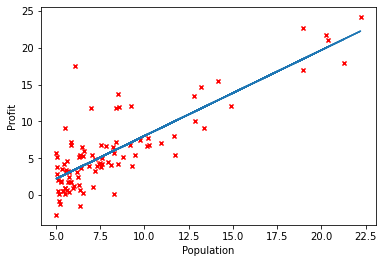

In [43]:
#Plotting the linear Fit on top of our examples
plt.plot(X_ext[1,:],(np.dot(theta.T,X_ext).reshape(X_ext.shape[1])))
plotData(X,y)

What is the value of our error for the line produced by the gradient descent?

In [50]:
print('Our cost function on the last iteration is {}'.format(
    J_history[-1][0]))

Our cost function on the last iteration is 4.483388256587727


**A really lower cost function when we compare with the arbitrary [0, 0] theta we used initially.**

We can now use this line to predict new values of profit based on population:

In [51]:
# Predict values for population with different sizes: 
def predict(size:float):
    try:
        prediction = np.dot(np.array([1,size]),theta)
        print ('For population {}, we predict a profit of {} dollars'.format(float(size)*10000, round(float(prediction*10000),2)))
    except ValueError: 
        raise('Ups! Not a number')

In [52]:
#Predict for 35000 population
predict(3.5)

#Predict for 80000 population
predict(8)

For population 35000.0, we predict a profit of 4519.77 dollars
For population 80000.0, we predict a profit of 57006.07 dollars


# Exercise 4 - Visualizing J according to different Thetas

The final exercise enables us to visualize the full cost function landscape - the wide array of J's that we have available for different thetas - and what is the specific area that minimizes this function.

In [53]:
# Grid over which we will calculate J and visualizing the cost 
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

In [54]:
# Placeholders for cost function according to different combination of thetas
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [55]:
for i in np.arange(len(theta0_vals)):
    for j in np.arange(len(theta1_vals)):
        t = np.array((theta0_vals[i],theta1_vals[j])).reshape(2,1)
        J_vals[i,j] = computeCost(X_ext,y,t)

Visualizing the cost function for different thetas makes us look at the region where we minimize this cost function. 
<br> 
<br>
What gradient descending is doing is going down this hill searching for a minimization of the cost function. **Our hope is that gradient descent ends up on a global minimum.**

We will visualize our cost as a surface and a contour plot.

Text(0.5, 0, 'Cost Function Value (J)')

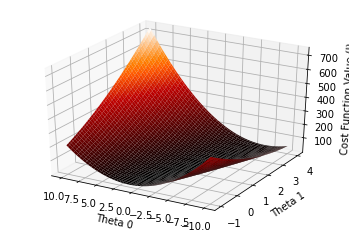

In [56]:
# Meshgrid both theta0 and theta1 vals
X_Grid, Y_Grid = np.meshgrid(theta0_vals, theta1_vals)

# Plot surface plot with different J(cost function) for each value of theta0 and theta1 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_Grid, Y_Grid, J_vals , cmap=cm.gist_heat)
ax.invert_xaxis()
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost Function Value (J)')

Text(0, 0.5, 'Theta 1')

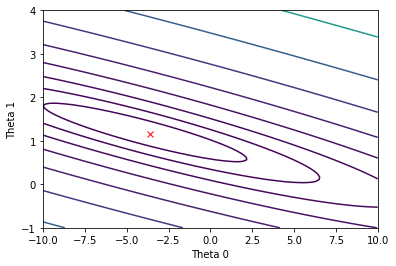

In [22]:
# Plot contour plot across logarithmic space
plt.contour(X_Grid, Y_Grid, J_vals.T, np.logspace(-2, 3, 20))
# Plot ideal theta with an X marker. Keep note that this mark is on 
# the middle of the contour plot, exactly in the minimum cost J
plt.plot(theta[0], theta[1], marker='x', color = 'red')
plt.xlabel('Theta 0') 
plt.ylabel('Theta 1')

The red cross marks the specific point where we minimize the value of J in respect to Theta 0 and Theta 1. In this example, even if you start in an arbitrary set of thetas you can be confident that the gradient descent algorithm will give you this final theta as J in respect to Theta is a concave function - by the 3d plot, there seems to only be one local minimum - therefore you should expect your gradient descent to find it after some set of iterations (dependent on the learning rate.). 